# 캡스톤디자인1 졸업작품
### 데이터사이언스학과
### 201884045 배상원

# 데이터 전처리

In [1]:
#데이터 불러오기 및 column이름 붙이기
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
rating_file_path = 'C:/Users/USER/Desktop/ml-1m/ratings.dat'
movie_file_path = 'C:/Users/USER/Desktop/ml-1m/movies.dat'
user_file_path = 'C:/Users/USER/Desktop/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', encoding='ISO-8859-1')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::', encoding='ISO-8859-1')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding='ISO-8859-1')

In [2]:
#필요없는 zipcode와 timestamp를 제거
user_data.drop('zipcode', axis = 1, inplace = True)
rating_data.drop('time', axis = 1, inplace = True)

In [3]:
#ratings, movies, users 데이터 합치기
df_ratings_movie = pd.merge(rating_data, movie_data, on='movie_id')
df_ratings_movie = df_ratings_movie.sort_values(by=['user_id'])
df = pd.merge(df_ratings_movie, user_data, on='user_id')

In [4]:
#데이터 결측값 및 type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   title       1000209 non-null  object
 4   genre       1000209 non-null  object
 5   gender      1000209 non-null  object
 6   age         1000209 non-null  int64 
 7   occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [5]:
#데이터 확인
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10
2,1,938,4,Gigi (1958),Musical,F,1,10
3,1,1207,4,To Kill a Mockingbird (1962),Drama,F,1,10
4,1,1721,4,Titanic (1997),Drama|Romance,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),Action|Adventure|Sci-Fi,M,25,6
1000205,6040,1947,4,West Side Story (1961),Musical|Romance,M,25,6
1000206,6040,904,4,Rear Window (1954),Mystery|Thriller,M,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),Horror|Sci-Fi,M,25,6


In [6]:
#genre 전처리
df['genre'] = df.genre.str.replace('Action', '01')
df['genre'] = df.genre.str.replace('Adventure', '02')
df['genre'] = df.genre.str.replace('Animation', '03')
df['genre'] = df.genre.str.replace('Children\'s', '04')
df['genre'] = df.genre.str.replace('Comedy', '05')
df['genre'] = df.genre.str.replace('Crime', '06')
df['genre'] = df.genre.str.replace('Documentary', '07')
df['genre'] = df.genre.str.replace('Drama', '08')
df['genre'] = df.genre.str.replace('Fantasy', '09')
df['genre'] = df.genre.str.replace('Film-Noir', '10')
df['genre'] = df.genre.str.replace('Horror', '11')
df['genre'] = df.genre.str.replace('Musical', '12')
df['genre'] = df.genre.str.replace('Mystery', '13')
df['genre'] = df.genre.str.replace('Romance', '14')
df['genre'] = df.genre.str.replace('Sci-Fi', '15')
df['genre'] = df.genre.str.replace('Thriller', '16')
df['genre'] = df.genre.str.replace('War', '17')
df['genre'] = df.genre.str.replace('Western', '18')

In [7]:
#gender 전처리
df['gender'] = df.gender.str.replace('F', '1')
df['gender'] = df.gender.str.replace('M', '2')
df['gender'] = df.gender.astype(int)

In [8]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),08,1,1,10
1,1,48,5,Pocahontas (1995),03|04|12|14,1,1,10
2,1,938,4,Gigi (1958),12,1,1,10
3,1,1207,4,To Kill a Mockingbird (1962),08,1,1,10
4,1,1721,4,Titanic (1997),08|14,1,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),01|02|15,2,25,6
1000205,6040,1947,4,West Side Story (1961),12|14,2,25,6
1000206,6040,904,4,Rear Window (1954),13|16,2,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),11|15,2,25,6


In [9]:
# genre 앞의 2자리 남기고 뒷부분 제거
df['genre'] = df.genre.str.slice(0,2).astype(int)

In [10]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),8,1,1,10
1,1,48,5,Pocahontas (1995),3,1,1,10
2,1,938,4,Gigi (1958),12,1,1,10
3,1,1207,4,To Kill a Mockingbird (1962),8,1,1,10
4,1,1721,4,Titanic (1997),8,1,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),1,2,25,6
1000205,6040,1947,4,West Side Story (1961),12,2,25,6
1000206,6040,904,4,Rear Window (1954),13,2,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),11,2,25,6


In [11]:
# 바뀐내용 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   title       1000209 non-null  object
 4   genre       1000209 non-null  int32 
 5   gender      1000209 non-null  int32 
 6   age         1000209 non-null  int64 
 7   occupation  1000209 non-null  int64 
dtypes: int32(2), int64(5), object(1)
memory usage: 61.0+ MB


In [12]:
df['genre'].value_counts().sort_index()#18개의 장르

1     257457
2      43630
3      36936
4      21491
5     276923
6      37849
7       6817
8     208627
9        790
10      9343
11     44170
12      7112
13     10237
14      2832
15     11464
16     17851
17       991
18      5689
Name: genre, dtype: int64

In [13]:
df['occupation'].value_counts().sort_index()#21개의 직업

0     130499
1      85351
2      50068
3      31623
4     131032
5      21850
6      37205
7     105425
8       2706
9      11345
10     23290
11     20563
12     57214
13     13754
14     49109
15     22951
16     46021
17     72816
18     12086
19     14904
20     60397
Name: occupation, dtype: int64

In [14]:
df['age'].value_counts().sort_index()#7개의 나이범주

1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: age, dtype: int64

In [15]:
#age는 원래대로 하는 것과 전처리해주는 것과 결과적으로 정규화를 거치면 차이가 없다.
#df['age'] = df.age.replace(1, '1')
#df['age'] = df.age.replace(18, '2')
#df['age'] = df.age.replace(25, '3')
#df['age'] = df.age.replace(35, '4')
#df['age'] = df.age.replace(45, '5')
#df['age'] = df.age.replace(50, '6')
#df['age'] = df.age.replace(56, '7')
#df['age'] = df.age.astype(int)

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 데이터 정규화

In [17]:
x = df.drop(['user_id', 'movie_id', 'title'], axis=1).values#독립변인들의 value값만 추출
y = df['user_id'].values # 종속변인 추출

x = StandardScaler().fit_transform(x)

features = ['rating', 'genre', 'gender', 'age', 'occupation']
df_scaled=pd.DataFrame(x, columns=features)
df_scaled

,rating,genre,gender,age,occupation
0,1.269747,0.723809,-1.748894,-2.445403,0.300683
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683
2,0.374573,1.792215,-1.748894,-2.445403,0.300683
3,0.374573,0.723809,-1.748894,-2.445403,0.300683
4,0.374573,0.723809,-1.748894,-2.445403,0.300683
...,...,...,...,...,...
1000204,-1.415775,-1.145902,0.571790,-0.403193,-0.311749
1000205,0.374573,1.792215,0.571790,-0.403193,-0.311749
1000206,0.374573,2.059316,0.571790,-0.403193,-0.311749
1000207,0.374573,1.525113,0.571790,-0.403193,-0.311749


# k-means clustering

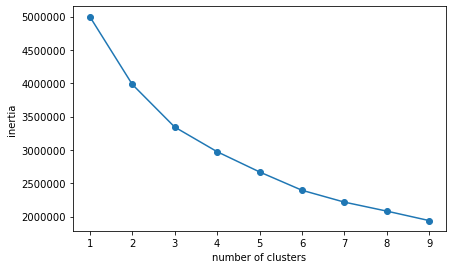

In [18]:
inertia = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.tight_layout()
plt.ticklabel_format(style='plain')
plt.show()

# pca + k-means

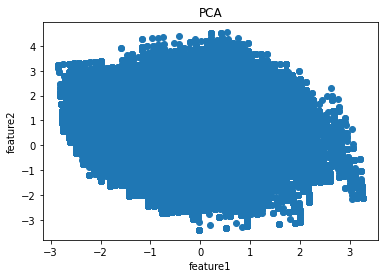

In [19]:
from sklearn import decomposition
import matplotlib.pyplot as plt


#compute PCA
pca = decomposition.PCA(n_components = 2)
pca.fit(df_scaled)
X_trans = pca.transform(df_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.title("PCA")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

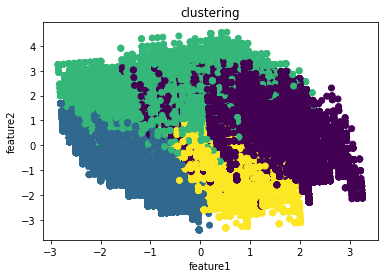

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_kmeans)
plt.title("clustering")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

# 군집 분석(clustering analysis)

In [21]:
clust_model = KMeans(n_clusters = 4)
clust_model.fit(df_scaled)
centers = clust_model.cluster_centers_
pred = clust_model.predict(df_scaled)

In [22]:
clust_df = df_scaled.copy()
clust_df['cluster'] = pred
clust_df

,rating,genre,gender,age,occupation,cluster
0,1.269747,0.723809,-1.748894,-2.445403,0.300683,3
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683,3
2,0.374573,1.792215,-1.748894,-2.445403,0.300683,3
3,0.374573,0.723809,-1.748894,-2.445403,0.300683,3
4,0.374573,0.723809,-1.748894,-2.445403,0.300683,3
...,...,...,...,...,...,...
1000204,-1.415775,-1.145902,0.571790,-0.403193,-0.311749,0
1000205,0.374573,1.792215,0.571790,-0.403193,-0.311749,2
1000206,0.374573,2.059316,0.571790,-0.403193,-0.311749,2
1000207,0.374573,1.525113,0.571790,-0.403193,-0.311749,2


In [23]:
clust_df.sort_values(by=['cluster'], axis=0)

,rating,genre,gender,age,occupation,cluster
1000208,-1.415775,0.723809,0.571790,-0.403193,-0.311749,0
408907,-1.415775,-0.878800,0.571790,0.447728,-0.158641,0
408906,-1.415775,-0.077496,0.571790,0.447728,-0.158641,0
408905,-2.310949,-1.145902,0.571790,0.447728,-0.158641,0
408904,-1.415775,-0.077496,0.571790,0.447728,-0.158641,0
...,...,...,...,...,...,...
523093,1.269747,0.723809,-1.748894,-0.403193,0.913116,3
523092,-0.520601,-0.077496,-1.748894,-0.403193,0.913116,3
523091,-0.520601,-0.878800,-1.748894,-0.403193,0.913116,3
523089,-0.520601,-1.145902,-1.748894,-0.403193,0.913116,3


In [24]:
clus0 = clust_df['cluster'] == 0
cluster0 = clust_df[clus0]
cluster0.head()

,rating,genre,gender,age,occupation,cluster
237,-0.520601,-1.145902,0.57179,1.298648,-0.158641,0
239,-1.415775,-1.145902,0.57179,1.298648,-0.158641,0
242,-2.310949,-1.145902,0.57179,1.298648,-0.158641,0
523,1.269747,-1.145902,0.57179,0.447728,-1.077290,0
524,1.269747,-1.145902,0.57179,0.447728,-1.077290,0


In [25]:
clus1 = clust_df['cluster'] == 1
cluster1 = clust_df[clus1]
cluster1.head()

,rating,genre,gender,age,occupation,cluster
53,-0.520601,-0.077496,0.57179,2.234661,1.219332,1
54,-0.520601,-1.145902,0.57179,2.234661,1.219332,1
55,-0.520601,0.723809,0.57179,2.234661,1.219332,1
56,1.269747,0.723809,0.57179,2.234661,1.219332,1
57,0.374573,0.723809,0.57179,2.234661,1.219332,1


In [26]:
clus2 = clust_df['cluster'] == 2
cluster2 = clust_df[clus2]
cluster2.head()

,rating,genre,gender,age,occupation,cluster
183,1.269747,3.394824,0.57179,-0.403193,1.066224,2
236,1.269747,0.723809,0.57179,1.298648,-0.158641,2
262,-1.415775,2.860621,0.57179,-0.403193,1.831764,2
271,-0.520601,2.326418,0.57179,-0.403193,1.831764,2
273,0.374573,2.593519,0.57179,-0.403193,1.831764,2


In [27]:
clus3 = clust_df['cluster'] == 3
cluster3 = clust_df[clus3]
cluster3.head()

,rating,genre,gender,age,occupation,cluster
0,1.269747,0.723809,-1.748894,-2.445403,0.300683,3
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683,3
2,0.374573,1.792215,-1.748894,-2.445403,0.300683,3
3,0.374573,0.723809,-1.748894,-2.445403,0.300683,3
4,0.374573,0.723809,-1.748894,-2.445403,0.300683,3


## 클러스터 나이 비교

In [28]:
cluster0['age'].value_counts().sort_index()

-2.445403     15523
-0.998837     82818
-0.403193    128623
 0.447728     48770
 1.298648      9962
 1.724109      7066
 2.234661      1939
Name: age, dtype: int64

In [29]:
cluster1['age'].value_counts().sort_index()

-2.445403      1304
-0.998837     30646
-0.403193    109623
 0.447728     59948
 1.298648     28287
 1.724109     25569
 2.234661     16901
Name: age, dtype: int64

In [30]:
cluster2['age'].value_counts().sort_index()

-2.445403     1559
-0.998837    24746
-0.403193    66631
 0.447728    41581
 1.298648    21887
 1.724109    22305
 2.234661    11041
Name: age, dtype: int64

In [31]:
cluster3['age'].value_counts().sort_index()

-2.445403     8825
-0.998837    45326
-0.403193    90679
 0.447728    48704
 1.298648    23497
 1.724109    17550
 2.234661     8899
Name: age, dtype: int64

## 클러스터 장르 비교

In [32]:
cluster0['genre'].value_counts().sort_index()

-1.145902    123667
-0.878800     18624
-0.611699     15398
-0.344597      8632
-0.077496    102493
 0.189606     11482
 0.456707      1134
 0.723809     13032
 0.990910        33
 1.258012        44
 1.525113       162
Name: genre, dtype: int64

In [33]:
cluster1['genre'].value_counts().sort_index()

-1.145902    88141
-0.878800    14684
-0.611699    10539
-0.344597     5926
-0.077496    81519
 0.189606    11996
 0.456707     2010
 0.723809    49313
 0.990910      204
 1.258012     1482
 1.525113     6078
 1.792215      238
 2.059316      135
 2.326418       13
Name: genre, dtype: int64

In [34]:
cluster2['genre'].value_counts().sort_index()

-0.611699       81
-0.344597      283
-0.077496    16012
 0.189606     5958
 0.456707     1971
 0.723809    84841
 0.990910      426
 1.258012     5749
 1.525113    29322
 1.792215     4030
 2.059316     7513
 2.326418     1715
 2.593519     9885
 2.860621    15334
 3.127722      978
 3.394824     5652
Name: genre, dtype: int64

In [35]:
cluster3['genre'].value_counts().sort_index()

-1.145902    45649
-0.878800    10322
-0.611699    10918
-0.344597     6650
-0.077496    76899
 0.189606     8413
 0.456707     1702
 0.723809    61441
 0.990910      127
 1.258012     2068
 1.525113     8608
 1.792215     2844
 2.059316     2589
 2.326418     1104
 2.593519     1579
 2.860621     2517
 3.127722       13
 3.394824       37
Name: genre, dtype: int64

## 클러스터 성별 비교

In [36]:
cluster0['gender'].value_counts().sort_index()

0.57179    294701
Name: gender, dtype: int64

In [37]:
cluster1['gender'].value_counts().sort_index()

-1.748894         1
 0.571790    272277
Name: gender, dtype: int64

In [38]:
cluster2['gender'].value_counts().sort_index()

-1.748894      2959
 0.571790    186791
Name: gender, dtype: int64

In [39]:
cluster3['gender'].value_counts().sort_index()

-1.748894    243480
Name: gender, dtype: int64

In [40]:
cluster0['occupation'].value_counts().sort_index()

-1.230398    65424
-1.077290    30126
-0.924182    21748
-0.771074    10238
-0.617966    74968
-0.464857    12321
-0.311749    11741
-0.158641    45914
-0.005533      671
 0.147575      254
 0.300683    13945
 0.453791     2466
 0.606899     4667
 0.760007       19
 0.913116      198
 1.372440        1
Name: occupation, dtype: int64

In [41]:
cluster1['occupation'].value_counts().sort_index()

-0.464857       24
-0.311749      940
-0.158641     8180
-0.005533      797
 0.147575      222
 0.300683      376
 0.453791    10177
 0.606899    34128
 0.760007     8564
 0.913116    32911
 1.066224    16948
 1.219332    34658
 1.372440    60281
 1.525548    10851
 1.678656    10861
 1.831764    42360
Name: occupation, dtype: int64

In [42]:
cluster2['occupation'].value_counts().sort_index()

-1.230398    32686
-1.077290    23229
-0.924182    12511
-0.771074     7325
-0.617966    23758
-0.464857     5663
-0.311749     9842
-0.158641    33614
-0.005533      620
 0.147575      439
 0.300683     1986
 0.453791     5300
 0.606899    11705
 0.760007     2412
 0.913116     4076
 1.066224     1830
 1.219332     4019
 1.372440     4944
 1.525548      828
 1.678656      577
 1.831764     2386
Name: occupation, dtype: int64

In [43]:
cluster3['occupation'].value_counts().sort_index()

-1.230398    32389
-1.077290    31996
-0.924182    15809
-0.771074    14060
-0.617966    32306
-0.464857     3842
-0.311749    14682
-0.158641    17717
-0.005533      618
 0.147575    10430
 0.300683     6983
 0.453791     2620
 0.606899     6714
 0.760007     2759
 0.913116    11924
 1.066224     4173
 1.219332     7344
 1.372440     7590
 1.525548      407
 1.678656     3466
 1.831764    15651
Name: occupation, dtype: int64

## 클러스터 평점 비교

In [44]:
cluster0['rating'].value_counts().sort_index()

-2.310949    23387
-1.415775    42993
-0.520601    83318
 0.374573    92996
 1.269747    52007
Name: rating, dtype: int64

In [45]:
cluster1['rating'].value_counts().sort_index()

-2.310949    13093
-1.415775    28101
-0.520601    74518
 0.374573    96742
 1.269747    59824
Name: rating, dtype: int64

In [46]:
cluster2['rating'].value_counts().sort_index()

-2.310949     6377
-1.415775    12015
-0.520601    40901
 0.374573    73371
 1.269747    57086
Name: rating, dtype: int64

In [47]:
cluster3['rating'].value_counts().sort_index()

-2.310949    13317
-1.415775    24448
-0.520601    62460
 0.374573    85862
 1.269747    57393
Name: rating, dtype: int64

군집 비교 분석 결과
cluster0은 액션, 코미디 장르를 좋아하며 성별은 여자가 전부이다. 직업이 대학생이나 대학원생이 가장 큰 비중을 차지했다.
cluster1은 액션, 코미디, 드라마 장르를 좋아하며 성별은 전부 여자다. 직업이 기술자와 엔지니어가 가장 큰 비중을 차지했다.
cluster2은 호러, 스릴러 남자와 여자 모두 포함하며 직업은 임원/관리자가 가장 큰 비중을 차지했다.
cluster3은 액션, 코미디, 드라마 성별은 전부 남자이며, 직업이 대학생과 대학원생, 교육자가 큰 비중을 차지한다.